In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (Input,
                                     Dense,
                                     Flatten,
                                     BatchNormalization,
                                     LeakyReLU,
                                     Reshape)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image
import random

In [ ]:
# model compile

In [ ]:
#loading MNIST data
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [ ]:
x_val, y_val = x_test[:9000], y_test[:9000]
x_test, y_test = x_test[9000:], y_test[9000:]

In [ ]:
x_train.shape

(60000, 28, 28)

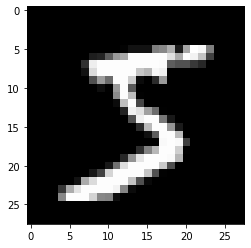

In [ ]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [ ]:
#patch image to be added to each image in MNIST
im_patch = Image.new(mode='L', size=(8,8), color=128)

im_patch

In [ ]:
# array to keep pixel positions,
# will be used to randomly select one upper corner pixel
# in the 28,28 image to add the 8,8 patch
pixel_pos = []
for i in range(21):
  pixel_pos.append(tuple((i,i)))

In [ ]:
# function to add and patch noise to an image
def add_patch_noise(data, patch, pixel_pos=pixel_pos):
  noisy_imgs = []
  for image_ in data:
    #converting numpy array to image
    img = Image.fromarray(image_)

    #adding a patch through Image.paste
    j = random.randrange(len(pixel_pos))
    img.paste(patch, box = pixel_pos[j])

    #converting image to numpy array
    noisy_imgs.append(np.asarray(img))


  return np.stack(noisy_imgs, axis=0)

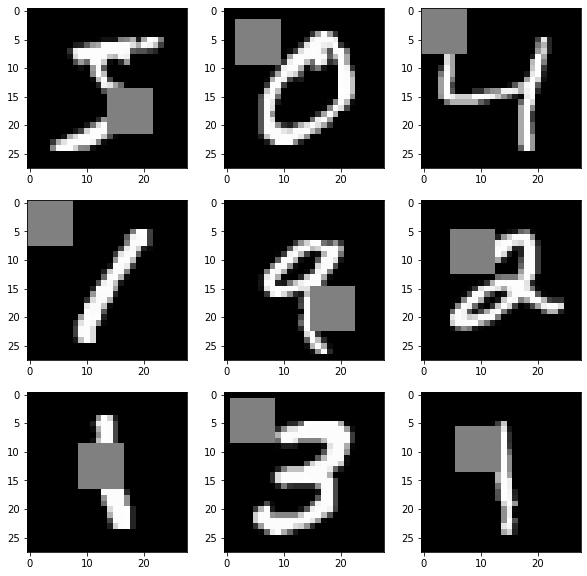

In [ ]:
#testing the add_patch_noise function for a small set of images
a = []
for i in range(9):
  a.append(x_train[i])

b = np.stack(a, axis =0)
c = add_patch_noise(b, patch=im_patch)
plt.figure(figsize=(10,10))
for i in range(c.shape[0]):
  plt.subplot(3,3,i+1)
  plt.imshow(c[i], cmap=plt.get_cmap('gray'))

In [ ]:
noisy_train_set = add_patch_noise(x_train, patch=im_patch)
noisy_val_set = add_patch_noise(x_val, patch=im_patch)
noisy_test_set = add_patch_noise(x_test, patch=im_patch)

In [ ]:
#all relu didn't perform well

In [ ]:
#input: flattened vector
input_img = Input(shape=(784,))
#encoder
encoded = Dense(300, activation='sigmoid')(input_img)
encoded = Dense(200, activation='sigmoid')(encoded)
encoded = Dense(100, activation='sigmoid')(encoded)
encoded = Dense(50, activation='sigmoid')(encoded)

#decoder
decoded = Dense(100, activation='sigmoid')(encoded)
decoded = Dense(200, activation='sigmoid')(decoded)
decoded = Dense(300, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 200)               60200     
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 100)               5100      
                                                                 
 dense_29 (Dense)            (None, 200)               2020

In [ ]:
x_train = x_train.reshape([60000,784])
noisy_train_set = noisy_train_set.reshape([60000,784])
x_val = x_val.reshape([9000, 784])
noisy_val_set = noisy_val_set.reshape([9000, 784])
noisy_test_set = noisy_test_set.reshape([1000, 784])

x_train = x_train.astype('float32')
noisy_train_set = noisy_train_set.astype('float32')
x_val = x_val.astype('float32')
noisy_val_set = noisy_val_set.astype('float32')
noisy_test_set = noisy_test_set.astype('float32')


x_train = x_train/255.
noisy_train_set = noisy_train_set/255.
x_val = x_val/255.
noisy_val_set = noisy_val_set/255.
noisy_test_set = noisy_test_set/255.


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# # callbacks
# es = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     verbose=1,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=True
# )
# # ckpt =

In [ ]:
history = autoencoder.fit(noisy_train_set, x_train, epochs=100,batch_size=32,shuffle=True, validation_data=(noisy_val_set, x_val)) #, callbacks=[es])

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2508 - val_loss: 0.2299
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2147 - val_loss: 0.1984
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1931 - val_loss: 0.1895
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1852 - val_loss: 0.1794
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1734 - val_loss: 0.1703
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1667 - val_loss: 0.1646
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1625 - val_loss: 0.1615
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1595 - val_loss: 0.1586
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1569 - val_loss: 0.1561
Epoch 10/100
1875/1875 [==============================] - 11s 6m

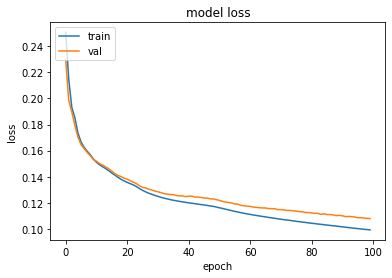

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
rec_imgs = autoencoder.predict(noisy_train_set)

rec_imgs = rec_imgs*255.

rec_imgs = rec_imgs.astype('uint8')

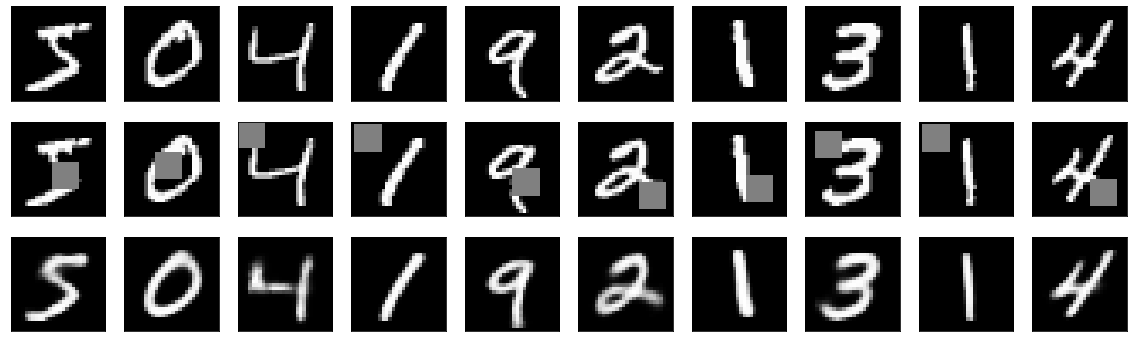

In [ ]:
n = 10
plt.figure(figsize=(20,6))

for i in range(n):

  # original images
  ax = plt.subplot(3,n, i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # images with noise
  ax = plt.subplot(3,n, i+1+n)
  plt.imshow(noisy_train_set[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # reconstructed images
  ax = plt.subplot(3,n, i+1+n+n)
  plt.imshow(rec_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
rec_imgs = autoencoder.predict(noisy_test_set)

rec_imgs = rec_imgs*255.

rec_imgs = rec_imgs.astype('uint8')

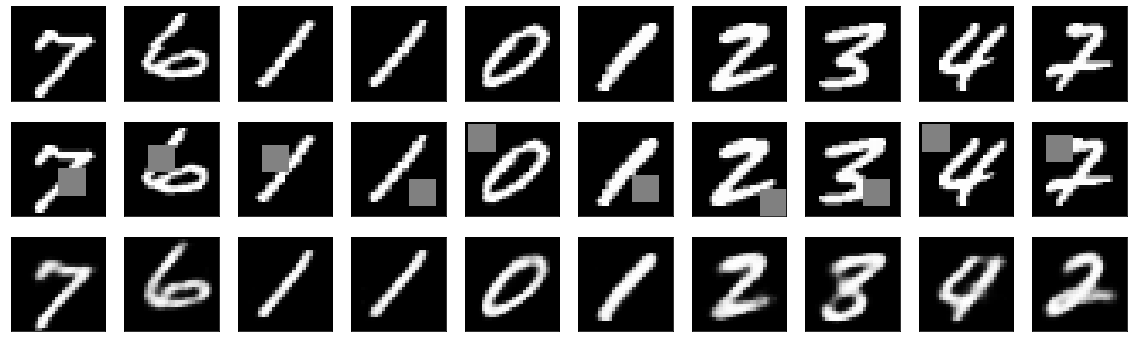

In [ ]:
n = 10
plt.figure(figsize=(20,6))

for i in range(n):

  # original images
  ax = plt.subplot(3,n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # images with noise
  ax = plt.subplot(3,n, i+1+n)
  plt.imshow(noisy_test_set[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # reconstructed images
  ax = plt.subplot(3,n, i+1+n+n)
  plt.imshow(rec_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
#getting latent vector

# encoder = Model(inputs=input_img, outputs=encoded)

# latent_vector = encoder.predict()